In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

In [2]:
import platform
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
pinkwink_web = pd.read_csv('../data/08. PinkWink Web Traffic.csv', encoding='euc-kr', thousands=',', names = ['date','hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


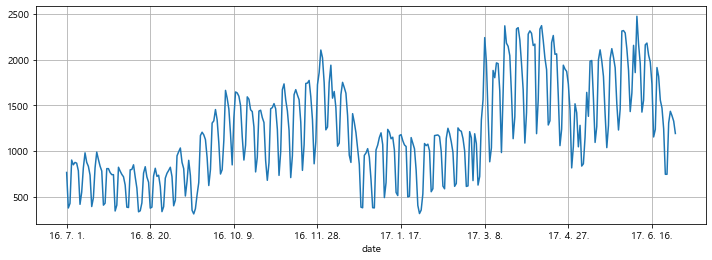

In [4]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True);

In [5]:
time = np.arange(0,len(pinkwink_web))
traffic = pinkwink_web['hit'].values

fx = np.linspace(0, time[-1], 1000)

In [6]:
def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [7]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.85973081109626
430.6284101894695
429.53280466762925
330.47773079342267


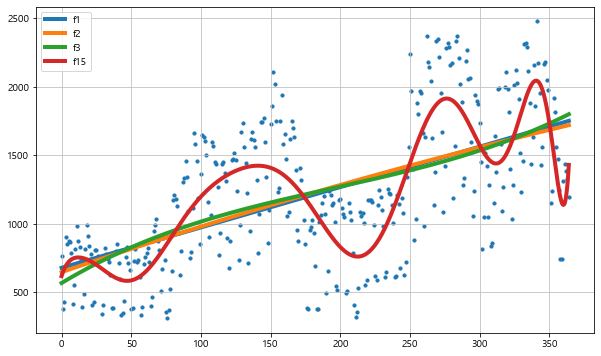

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')

plt.legend(loc=2)
plt.show()

In [9]:
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] =  pd.to_datetime(df['ds'], format="%y. %m. %d.")
del df['date']

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [10]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [11]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,896.576571,691.867129,1104.088473
421,2017-08-26,481.544412,277.397753,701.726165
422,2017-08-27,614.212001,391.349348,818.594221
423,2017-08-28,1166.966207,941.265530,1379.142760
424,2017-08-29,1203.000155,993.289650,1413.856632


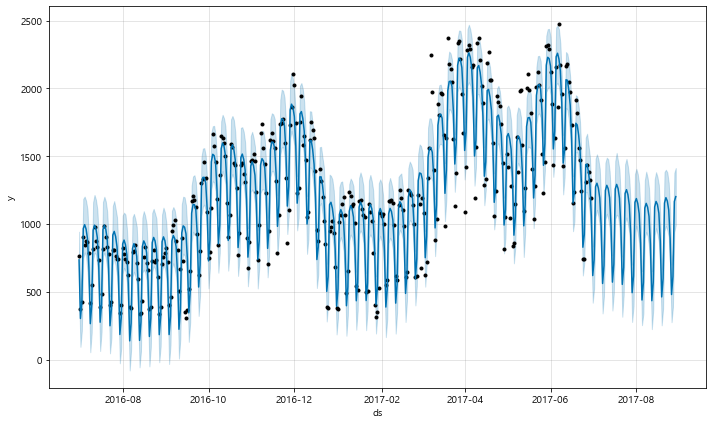

In [12]:
m.plot(forecast);

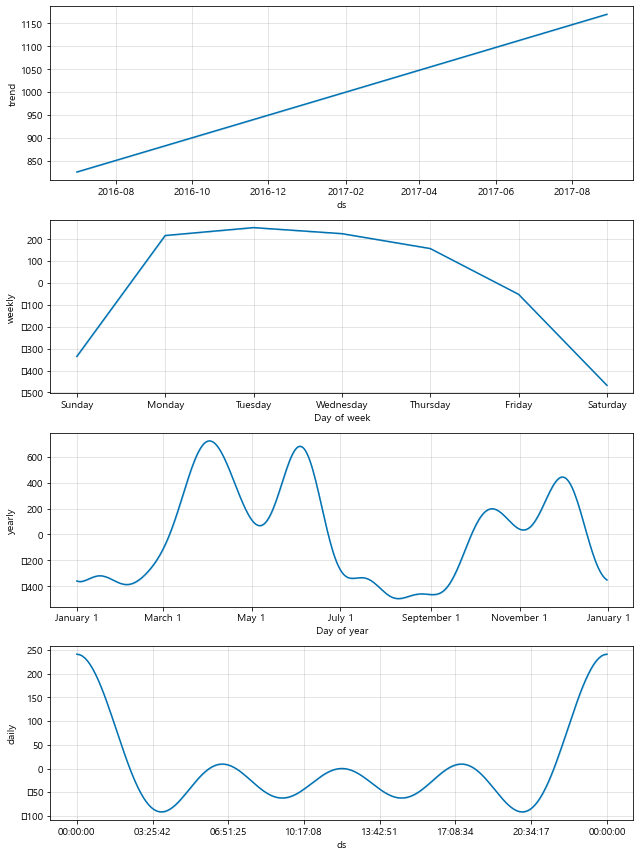

In [13]:
m.plot_components(forecast);

In [45]:
start = datetime(2015, 1, 1) 
end = datetime(2022, 3, 29) 
KIA = web.DataReader('000270.KS','yahoo',start,end)
KIA.head()

# start = datetime(2003, 1, 1) 
# end = datetime(2022, 3, 29) 
# KIA = web.DataReader('000270','naver',start,end)
# KIA.head() #이건 콤마가 있는 문자형태라 이후 과정이 진행이 안됨.

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,52600.0,51600.0,51600.0,52300.0,616867.0,43717.968750
2015-01-05,52300.0,51600.0,52200.0,52000.0,651421.0,43467.199219
2015-01-06,51600.0,50900.0,51500.0,51200.0,777311.0,42798.476562
2015-01-07,52100.0,50500.0,50500.0,51800.0,598333.0,43300.019531
2015-01-08,52600.0,51800.0,51800.0,52200.0,701430.0,43634.378906


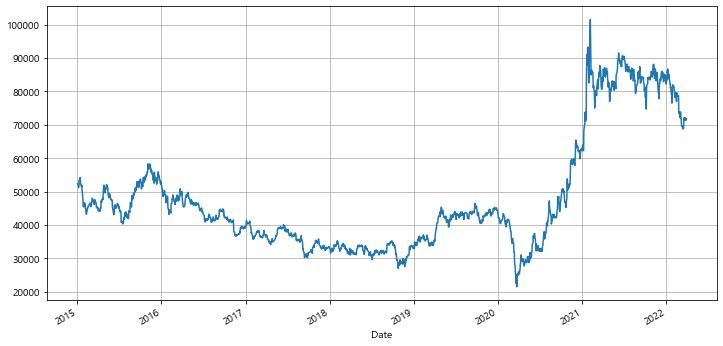

In [46]:
KIA['Close'].plot(figsize=(12,6), grid=True);

In [47]:
KIA_trunc = KIA[:'2021-12-31']
KIA_trunc

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,52600.0,51600.0,51600.0,52300.0,616867.0,43717.968750
2015-01-05,52300.0,51600.0,52200.0,52000.0,651421.0,43467.199219
2015-01-06,51600.0,50900.0,51500.0,51200.0,777311.0,42798.476562
2015-01-07,52100.0,50500.0,50500.0,51800.0,598333.0,43300.019531
2015-01-08,52600.0,51800.0,51800.0,52200.0,701430.0,43634.378906
...,...,...,...,...,...,...
2021-12-24,85800.0,84500.0,84700.0,85100.0,1210818.0,82078.695312
2021-12-27,85800.0,84800.0,85400.0,84800.0,627895.0,81789.351562
2021-12-28,85200.0,83800.0,85000.0,84500.0,1209343.0,81500.000000


In [48]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2015-01-02,52300.0
1,2015-01-05,52000.0
2,2015-01-06,51200.0
3,2015-01-07,51800.0
4,2015-01-08,52200.0


In [49]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [50]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2082,2022-12-26
2083,2022-12-27
2084,2022-12-28
2085,2022-12-29
2086,2022-12-30


In [51]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2082,2022-12-26,138255.076727,127072.148368,149109.317816
2083,2022-12-27,138476.379357,127035.440685,150202.422546
2084,2022-12-28,138650.106212,127072.243784,149078.691896
2085,2022-12-29,138760.574629,127306.981082,150621.575695
2086,2022-12-30,139020.527051,126887.737515,150185.409988


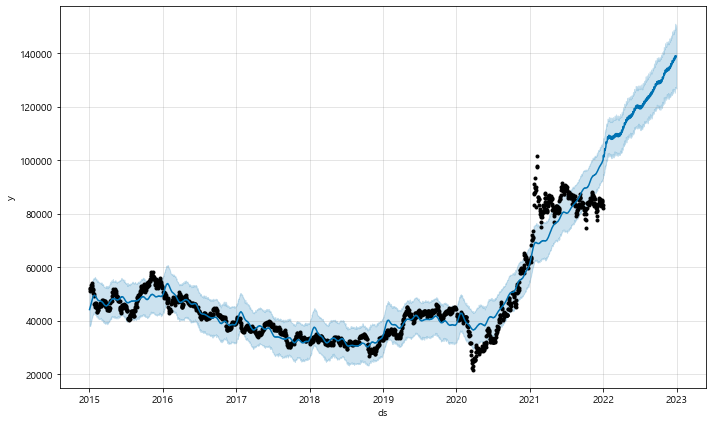

In [52]:
m.plot(forecast);

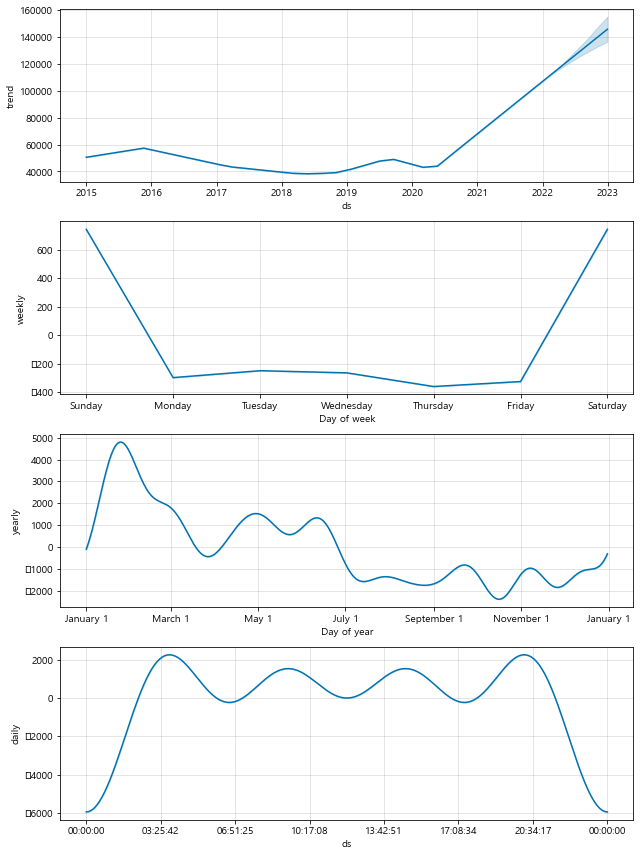

In [53]:
m.plot_components(forecast);

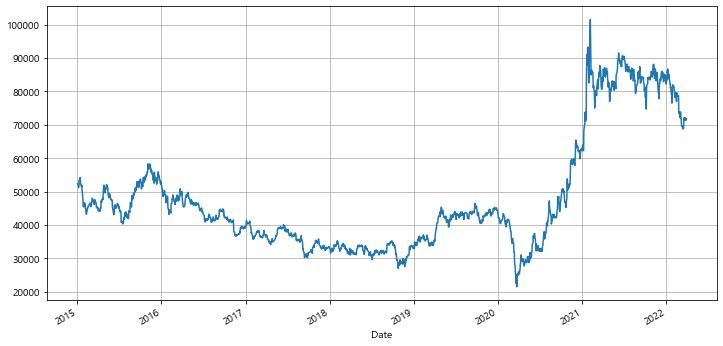

In [54]:
start = datetime(2015, 1, 1) 
end = datetime(2022, 3, 29) 
KIA = web.DataReader('000270.KS','yahoo',start,end)
KIA['Close'].plot(figsize=(12,6), grid=True);

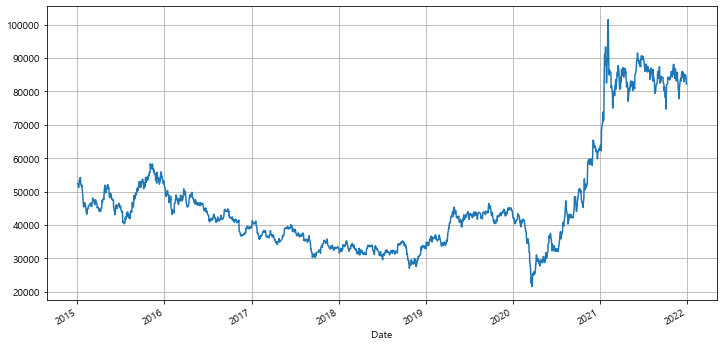

In [55]:
KIA_trunc = KIA[:'2022-01-1']
KIA_trunc['Close'].plot(figsize=(12,6), grid=True);

In [56]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']

In [57]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [58]:
future = m.make_future_dataframe(periods=61)
future.tail()

,ds
1778,2022-02-25
1779,2022-02-26
1780,2022-02-27
1781,2022-02-28
1782,2022-03-01


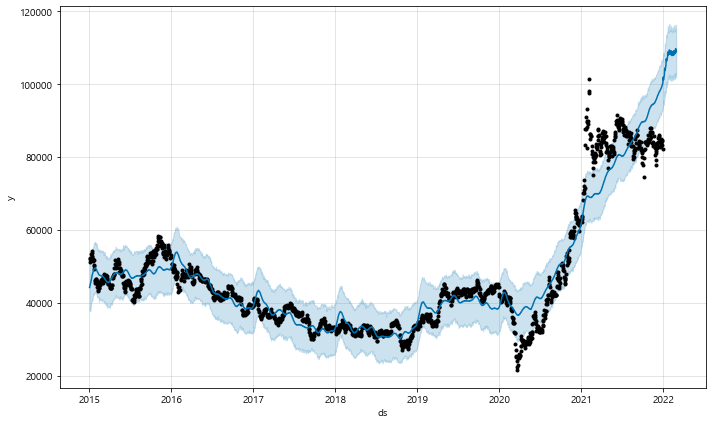

In [59]:
forecast = m.predict(future)
m.plot(forecast);

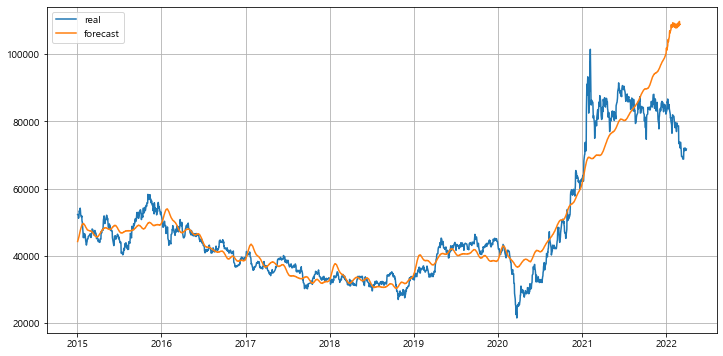

In [60]:
plt.figure(figsize=(12,6))
plt.plot(KIA.index, KIA['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

In [61]:
df = pd.read_csv('../data/08. example_wp_R.csv')
df['y'] = np.log(df['y'])

In [62]:
df['cap'] = 8.5

In [63]:
m = Prophet(growth='logistic', daily_seasonality=True)
m.fit(df)

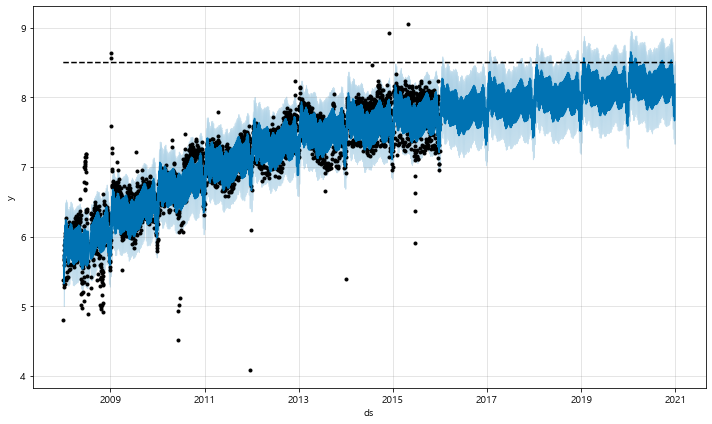

In [64]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst);

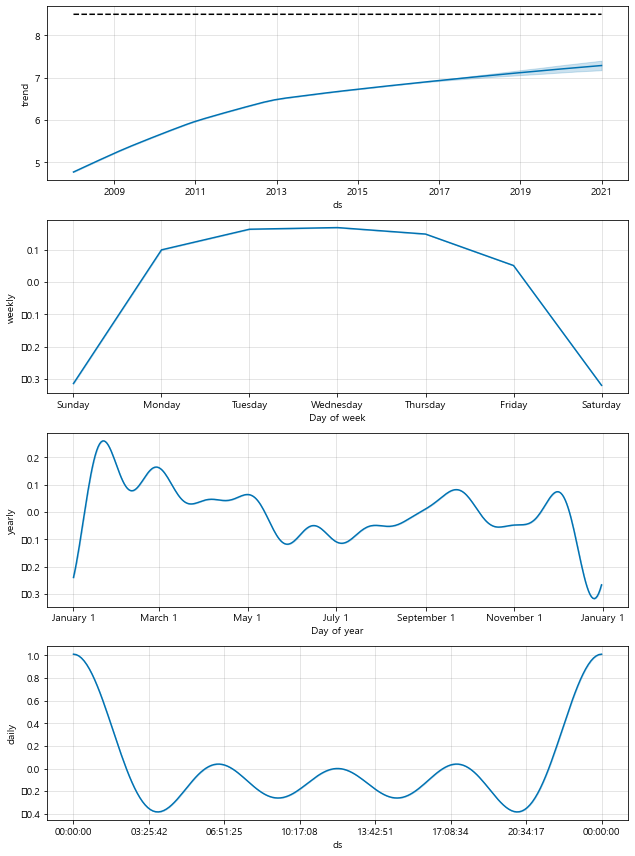

In [65]:
forecast = m.predict(future)
m.plot_components(forecast);